In [63]:
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split the dataset into trainig and testing
from sklearn.model_selection import train_test_split

# Supervised algorithms for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Libraries for metrics determination
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [64]:
df = pd.read_csv('creditcardcsvpresent.csv')

In [65]:
df_copy = df.copy()

In [66]:
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [68]:
df.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


## Data Cleaning

#### Issues
- Transaction date column is completely empty so we will remove this column
- Merchant id column is not really needed for this task as it does not add significant meaning to the dataset

In [69]:
# Both columns are been dropped here
df.drop(columns=['Merchant_id','Transaction date'], inplace=True)

# lets take a look at the changes made
df

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


In [70]:
# data set for analysis
df_analysis = df.copy()

In [71]:
columns =['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']
for column in columns:
    df_analysis[column] = df_analysis[column].map({'Y':'YES', 'N':'NO'})

df_analysis

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,NO,5,YES,YES,0,0.0,0,YES
1,100.0,4300.0,NO,5,YES,YES,0,0.0,0,YES
2,185.5,4823.0,YES,5,NO,NO,0,0.0,0,YES
3,185.5,5008.5,YES,8,NO,NO,0,0.0,0,YES
4,500.0,26000.0,NO,0,YES,YES,800,677.2,6,YES
...,...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,YES,0,NO,NO,754,585.0,7,NO
3071,800.0,0.0,YES,0,NO,NO,754,585.0,7,NO
3072,800.0,20800.0,YES,0,NO,NO,754,585.0,7,NO
3073,1500.0,12000.0,YES,0,YES,YES,754,585.0,7,NO


## Data Analysis

- Since we have cleaned the dataset, lets go on to analyze the dataset

In [72]:
# Function for plotting bar chart

def bar(col, title, x_label, y_label):
    df_analysis[col].value_counts().plot(kind='bar');
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=0)

### Fraudulent to Non-Fraudulent transactions 

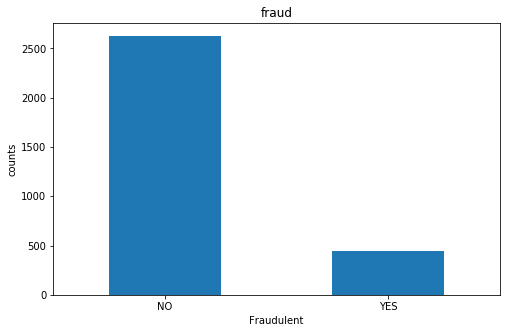

In [73]:
# df['isFradulent'].value_counts().plot(kind='bar');

plt.figure(figsize=[8,5])
bar('isFradulent', 'fraud', 'Fraudulent', 'counts')

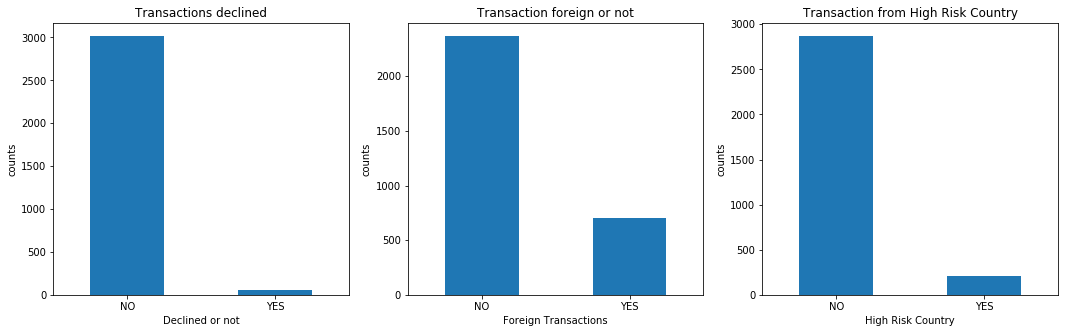

In [74]:
plt.figure(figsize=[18,5])

plt.subplot(1,3,1)
bar('Is declined', 'Transactions declined', 'Declined or not', 'counts')

plt.subplot(1,3,2)
bar('isForeignTransaction', 'Transaction foreign or not', 'Foreign Transactions', 'counts')

plt.subplot(1,3,3)
bar('isHighRiskCountry', 'Transaction from High Risk Country', 'High Risk Country', 'counts')

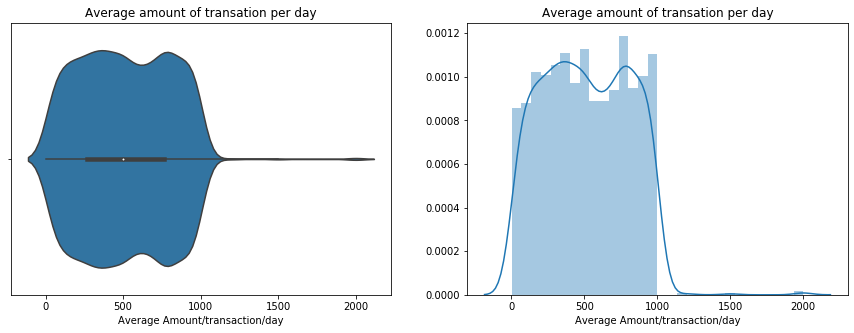

In [75]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(x ='Average Amount/transaction/day',  data = df_analysis);
plt.title('Average amount of transation per day')

plt.subplot(1,2,2)
sns.distplot(df_analysis["Average Amount/transaction/day"], kde = True);
plt.title('Average amount of transation per day');

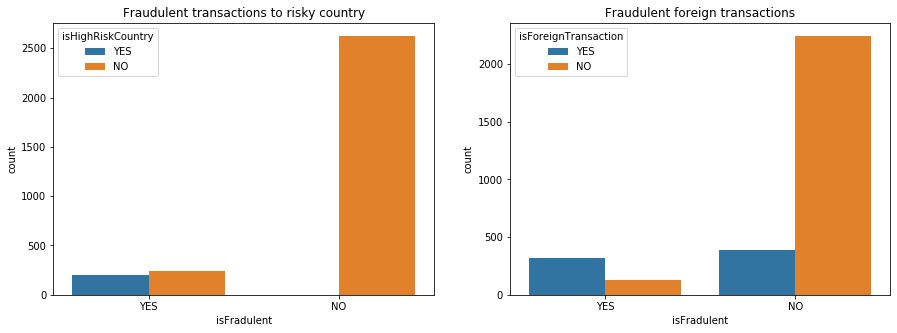

In [76]:
# Plot countplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(
                   x="isFradulent", 
                   data=df_analysis, 
                   hue='isHighRiskCountry') 
# Set title
plt.title("Fraudulent transactions to risky country") 

plt.subplot(1,2,2)
sns.countplot(
                   x="isFradulent", 
                   data=df_analysis, 
                   hue='isForeignTransaction') 
# Set title
plt.title("Fraudulent foreign transactions"); 

Text(0.5, 1.0, 'Transaction amount')

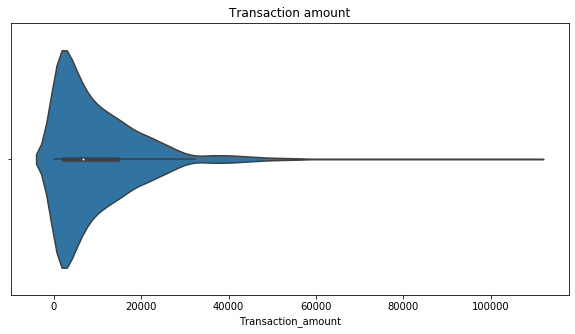

In [77]:
plt.figure(figsize=(10,5))
sns.violinplot(x ='Transaction_amount',  data = df_analysis)
plt.title('Transaction amount')

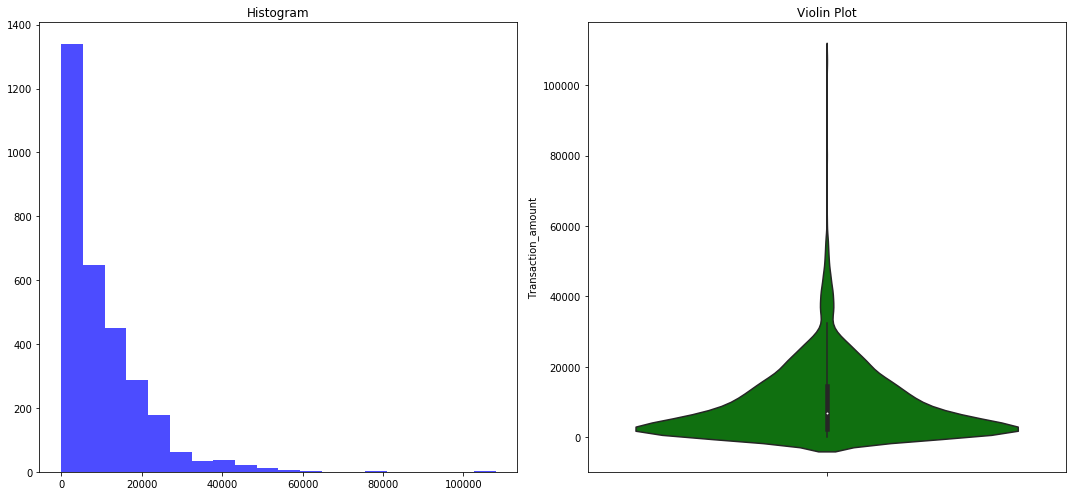

In [78]:


column_name = 'Transaction_amount'  

# Create a figure with one row and two columns (1x2 grid)
fig, axs = plt.subplots(1, 2, figsize=(15, 7), tight_layout=True)

# Plot a histogram on the first subplot (axs[0])
axs[0].hist(df_analysis[column_name], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Histogram')

# Plot a violin plot on the second subplot (axs[1])
sns.violinplot(data=df_analysis, y=column_name, ax=axs[1], color='green')
axs[1].set_title('Violin Plot')

# Show the combined figure with both subplots
plt.show()

- The above chart shows that most transactions recorded are not fraudulent and this account for an unbalanced dataset for our target feature

In [79]:
# color =['lightcoral','yellowgreen']
# explode =(0.1,0) # explode first and second slice
# labels = df['isFradulent'].unique()

# plt.pie(df['isFradulent'].value_counts(), explode=explode, labels=labels, colors=color, autopct='%1.1f%%', 
#         shadow=True, startangle=140)
# plt.axis('equal')
# plt.show()

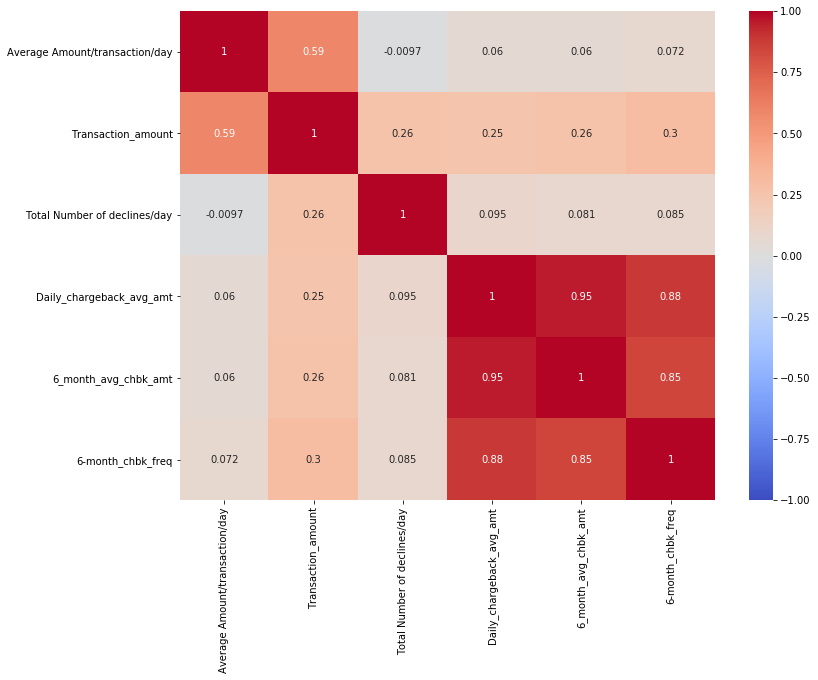

In [80]:
plt.figure(figsize=[12,9])
sns.heatmap(df_analysis.corr(),vmin=-1, vmax=1,cmap='coolwarm', annot=True)

## Model Building

- let us first encode categorical columns to numeric so as to be able to build our model

In [81]:
columns =['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']
for column in columns:
    df[column] = df[column].map({'Y':1, 'N':0})

df

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,500.0,26000.0,0,0,1,1,800,677.2,6,1
...,...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,0,0,754,585.0,7,0
3071,800.0,0.0,1,0,0,0,754,585.0,7,0
3072,800.0,20800.0,1,0,0,0,754,585.0,7,0
3073,1500.0,12000.0,1,0,1,1,754,585.0,7,0


- We are then going to divide the data into dependent (x) and independent (y) features

In [82]:
x = df.drop('isFradulent', axis =1)

y = df['isFradulent']

In [83]:
print(x.shape)
print(y.shape)

(3075, 9)
(3075,)


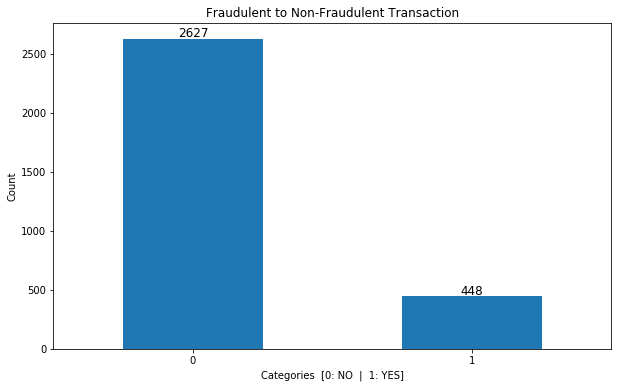

In [84]:


# Let's keep the total count of each categories in our independent variable y
value_counts = y.value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
ax = value_counts.plot(kind='bar')

# Add count labels on top of each bar
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Categories  [0: NO  |  1: YES]")
plt.ylabel("Count")
plt.title("Fraudulent to Non-Fraudulent Transaction")
plt.xticks(rotation=0)  # Rotate x-axis labels 

plt.show()


From the above graph, we can see that the dataset is not balanced, but then, let's build a model with it and compare with a balanced dataset

In [85]:
# from sklearn.model_selection import train_test_split
# splitting the model into training and test set

x_train, x_test,  y_train, y_test = train_test_split(x,y, test_size=0.2)

In [86]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB




# from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [87]:
# storing all algorithm for use in a dictionary for easy integration
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine" : SVC()
}

In [88]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train Model
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred =  model.predict(x_test)

    print(list(models.keys())[i])
    
    # Training set performance
    print('Model performance for Training set ')
    print(f'- Accuracy: {accuracy_score(y_train, y_train_pred):.4f}')
    print(f'- F1 score: {f1_score(y_train, y_train_pred):.4f}')
    print(f'- Precision: {precision_score(y_train, y_train_pred ):.4f}')
    print(f'- Recall: {recall_score(y_train, y_train_pred):.4f}')

    print('-'*35)
    
     # Test set performance
    print('Model performance for Test set ')
    print(f'- Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
    print(f'- F1 score: {f1_score(y_test, y_test_pred):.4f}')
    print(f'- Precision: {precision_score(y_test, y_test_pred ):.4f}')
    print(f'- Recall: {recall_score(y_test, y_test_pred):.4f}')


    print(f'*'*35)
    print('\n')

Logisitic Regression
Model performance for Training set 
- Accuracy: 0.9919
- F1 score: 0.9718
- Precision: 0.9857
- Recall: 0.9582
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9870
- F1 score: 0.9535
- Precision: 0.9880
- Recall: 0.9213
***********************************


Decision Tree
Model performance for Training set 
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9756
- F1 score: 0.9133
- Precision: 0.9405
- Recall: 0.8876
***********************************


Random Forest
Model performance for Training set 
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9756
- F1 score: 0.9133
- Precision: 0.9405
- Recall: 0.8876
***********************************


K-Nearest Neighbors
Model performance for Training set 
- Accuracy: 0.9435


### Balancing the dataset using SMOTE technique

The dataset is been balanced so as to:
- **Prevent Bias and Skewness:** An imbalanced dataset, where one class greatly outnumbers the others, can introduce bias and skew the model's predictions. The model tends to be more biased towards the majority class and might perform poorly in predicting minority classes. This is particularly important in situations where the minority class is of great interest, such as fraud detection or disease diagnosis.

- **Improve Model Performance:** Balanced datasets often result in better model performance. When the dataset is imbalanced, a model may achieve high accuracy by simply predicting the majority class most of the time. Balancing the dataset encourages the model to learn features and patterns from all classes, making it more robust and accurate in generalizing to unseen data.

- **Enhance Feature Importance:** In an imbalanced dataset, the features associated with the majority class tend to dominate feature importance. Balancing the dataset helps the model recognize the importance of features for all classes, leading to more meaningful insights.

In [90]:
# Using SMOTE technique to balance the dataset

from imblearn.over_sampling import SMOTE
over = SMOTE()
x_new, y_new = over.fit_resample(x,y)

### Comparing the Balanced and Unbalanced Data set

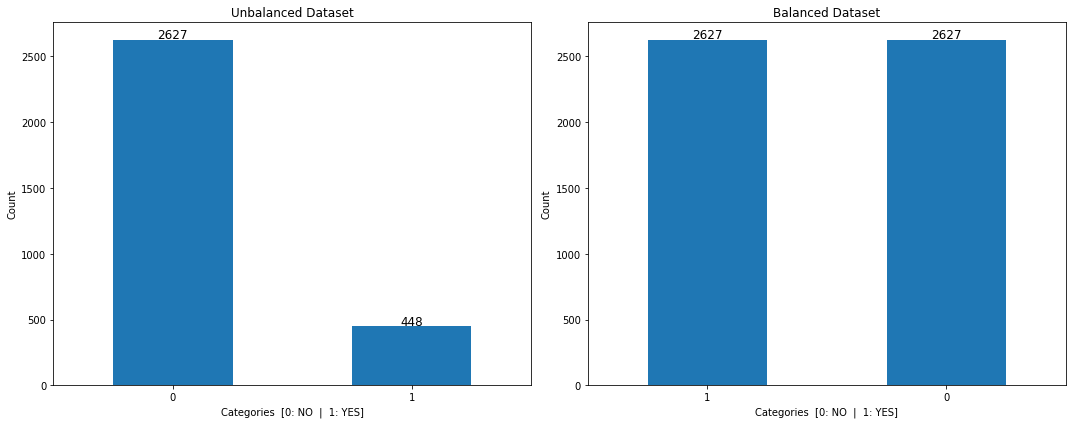

In [91]:

# Assuming you have two pandas Series 'y' and 'y_new'
value_counts = y.value_counts()
value_counts_new = y_new.value_counts()

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(15, 6))  # You can adjust the figure size as needed

# First subplot
plt.subplot(1, 2, 1)
ax1 = value_counts.plot(kind='bar')
for i in ax1.patches:
    ax1.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Categories  [0: NO  |  1: YES]")
plt.ylabel("Count")
plt.title("Unbalanced Dataset")
plt.xticks(rotation=0)

# Second subplot
plt.subplot(1, 2, 2)
ax2 = value_counts_new.plot(kind='bar')
for i in ax2.patches:
    ax2.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Categories  [0: NO  |  1: YES]")
plt.ylabel("Count")
plt.title("Balanced Dataset")
plt.xticks(rotation=0)

plt.tight_layout()  # Adjust subplot parameters for a clean layout

plt.show()


We can observe that the chart on our right side is balanced with both fraudulent and Non-Fraudulent transactions been same. This will help prevent bias and skewness from our model.

### Let's split the ballanced data into training and testing

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2)

In [93]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train Model
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred =  model.predict(x_test)

    print(list(models.keys())[i])
    
    # Training set performance
    print('Model performance for Training set ')
    print(f'- Accuracy: {accuracy_score(y_train, y_train_pred):.4f}')
    print(f'- F1 score: {f1_score(y_train, y_train_pred):.4f}')
    print(f'- Precision: {precision_score(y_train, y_train_pred ):.4f}')
    print(f'- Recall: {recall_score(y_train, y_train_pred):.4f}')

    print('-'*35)
    
     # Test set performance
    print('Model performance for Test set ')
    print(f'- Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
    print(f'- F1 score: {f1_score(y_test, y_test_pred):.4f}')
    print(f'- Precision: {precision_score(y_test, y_test_pred ):.4f}')
    print(f'- Recall: {recall_score(y_test, y_test_pred):.4f}')


    print(f'*'*35)
    print('\n')

Logisitic Regression
Model performance for Training set 
- Accuracy: 0.9805
- F1 score: 0.9805
- Precision: 0.9805
- Recall: 0.9805
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9753
- F1 score: 0.9752
- Precision: 0.9752
- Recall: 0.9752
***********************************


Decision Tree
Model performance for Training set 
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9819
- F1 score: 0.9819
- Precision: 0.9828
- Recall: 0.9810
***********************************


Random Forest
Model performance for Training set 
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9810
- F1 score: 0.9812
- Precision: 0.9667
- Recall: 0.9962
***********************************


K-Nearest Neighbors
Model performance for Training set 
- Accuracy: 0.9619


- Looking at all models used for the training, Random Forest Classifier performed more better across all metrics used. So we will be using it to complete the project. 

In [94]:
# using RANDOM FOREST CLASSIFIER
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
rand_pred = rand.predict(x_test)

In [95]:
print('-------------RANDOM FOREST------------------')

print(f'Accuracy = {accuracy_score(y_test, rand_pred)*100}%')
print(f'f1 score = {f1_score(y_test, rand_pred)*100}%')
print(f'report :\n {classification_report(y_test,rand_pred)}')

-------------RANDOM FOREST------------------
Accuracy = 98.00190294957184%
f1 score = 98.03186504217433%
report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       526
           1       0.96      1.00      0.98       525

    accuracy                           0.98      1051
   macro avg       0.98      0.98      0.98      1051
weighted avg       0.98      0.98      0.98      1051



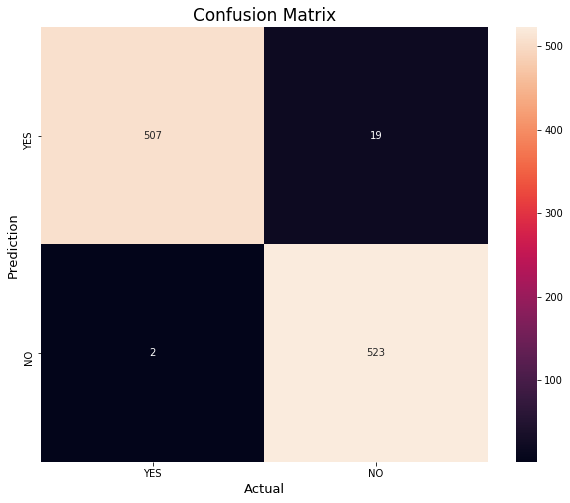

In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rand_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['YES', 'NO'],
            yticklabels=['YES', 'NO'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Feature Importance

- We are going to look at the most important features that was used for detecting fraud in our dataset

<BarContainer object of 9 artists>

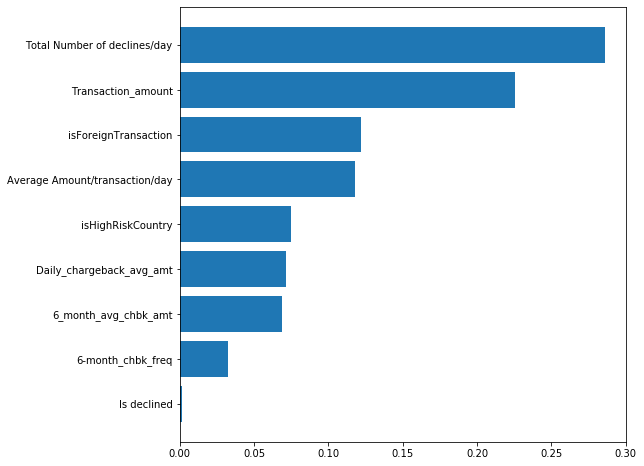

In [97]:
plt.figure(figsize=(8,8))
sorted_idx = rand.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rand.feature_importances_[sorted_idx])

## Save Model

In [99]:
import pickle

In [101]:
pickle.dump(rand, open("Credit_Card_Fraud.pkl", "wb"))